<p align="center">
  <img src="../image/green_coffee_beans.jpg" alt="Science Direct study of coffee beans quality and taste as it relates to environmental factors" width="75%">
</p>

<blockquote>
  <p>
    <strong>"Coffee is among the most popular beverages globally due to its unique sensory properties and pleasant taste (Pereira et al., 2020). There are two main species of coffee traded worldwide: Coffea arabica, which is the most produced and consumed, and Coffea robusta. Coffea arabica is known for its superior flavor and higher market value, when compared to Coffea robusta (El-Abassy et al., 2011). To ensure its superior quality, Coffea arabica has been cultivated in regions with specific characteristics, including well-distributed precipitation <b>(1200–1800 mm)</b> throughout the fruiting period, mild temperatures <b>(18–23 °C)</b>, and low altitude <b>(600–1200 m)</b> (de Mesquita et al., 2016). Brazil is the top producer of arabica coffee globally (do Rosário et al., 2023). According to the Brazilian National Supply Company (CONAB), it is estimated that in 2024, there will be a <b>5.5 % increase in green coffee beans production</b>, reaching 58.08 million 60 kg bags (Conab, 2024). The production of Coffea Arabica beans is expected to increase by <b>2% in 2024</b> with a significant portion cultivated in the Minas Gerais state (Conab, 2024). Notably, the Cerrado Mineiro region is vital, producing <b>12.7%</b> of national Coffea arabica beans and <b>25.4%</b> of the total production in the <b>Minas Gerais state</b> (Federation of Cerrado Coffee Growers, 2023)."</strong>
  </p>
  <p>
    — From <a href="https://www.sciencedirect.com/science/article/abs/pii/S0308814624033338" target="_blank">Science Direct</a>
  </p>
</blockquote>


# Explore Cofffee

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [1]:
# Import necessary libraries
from scipy.stats import pearsonr # for correlation calculation
import pandas as pd # for data manipulation using DataFrames
import numpy as np # for numerical operations 
import plotly.express as px # for interactive plots

import seaborn as sns # for data visualization 
import matplotlib.pyplot as plt # for data visualization 
import math # for mathematical operations not found in numpy or native python
import matplotlib.ticker as ticks # for axis formatting 

In [2]:
# import data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

In [3]:
# TODO: view first 5 rows of your data
coffee.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
1,Brazil,Espirito Santo,Arabica,2.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
2,Brazil,Espirito Santo,Robusta,7.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
3,Brazil,Sao Paulo,Arabica,3.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
4,Brazil,Parana,Arabica,0.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0


In [4]:
coffee.shape

(114, 11)

In [5]:
# TODO: describe your numeric columns
coffee.describe()

,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
count,114.000000,114.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,8.812281,2012.552632,994.495413,5646.926606,298.055046,2146.513761,2639.027523,3345.082569
std,9.051550,6.265642,310.338484,372.684151,97.572559,96.699000,245.497999,175.124513
min,0.500000,2002.000000,466.000000,4465.000000,148.000000,2010.000000,2106.000000,3030.000000
25%,2.600000,2007.000000,679.000000,5640.000000,205.000000,2070.000000,2552.000000,3191.000000
50%,4.750000,2013.000000,1050.000000,5735.000000,307.000000,2135.000000,2679.000000,3415.000000
75%,12.175000,2018.000000,1185.000000,5810.000000,347.000000,2223.000000,2786.000000,3483.000000
max,34.800000,2023.000000,1510.000000,6200.000000,495.000000,2360.000000,3020.000000,3578.000000


### Observations and Questions gained from Descriptive Statistics of Coffee Data Set:

**Observations**
-  Average production per year, 60kgs_bag, is ~8.81 bags, with a wide range from 0.5 to 34.8 bags suggesting possible outliers or unusually high-yield years.
  - The mean is ~8.8 and median ~4.8, which suggests a right skewed graph, meaning some higher value(s) are pulling the graph to the right.
- Nonbearing vs. bearing trees:
  - Nonbearing trees: ~994 avg, with high variability--std = 310
  - Bearing trees: ~5647 avg, with lower variability--std = 373--suggesting more stability in producing trees.
- Tree density per hectare:
  - Bearing trees: ~2639 trees/hectare
  - Nonbearing trees: ~3345 trees/hectare — denser planting in nonbearing sites may reflect newer, more intensive cultivation efforts.
- Hectares under production:
  - Bearing hectares: ~2146
  - Nonbearing hectares: ~298--much smaller area--consistent with newer sites still in development.                        

**Questions**
- Are the years with the highest 60kgs_bag values associated with maximum bearing tree count?
- Does tree density per hectare correlate positively or negatively with total yield?
- What farming practices or environmental conditions might explain the jump to 34.8 bags in the maximum year??
- Is there a yield plateau effect once bearing trees exceed a certain density??

**Additional Notes:**
- I may create a time series plot of 60kgs_bag vs. year, with a 3-year rolling average to visualize production stability.
- **TODO:** create scatter plots or correlation matrices to investigate relationships between:
  - Yield vs. tree count
  - Yield vs. density
  - Bearing vs. nonbearing production.

**Resources:**

In [6]:
# TODO: display the null values in your dataframe
coffee.isna().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                5
bearing_trees                   5
nonbear_hectares                5
bearing_hectares                5
bearing_trees_per_hectare       5
nonbearing_trees_per_hectare    5
dtype: int64

In [7]:
# TODO: drop your null values
dropp_coffee = coffee.dropna()

In [8]:
dropp_coffee.isna().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
dtype: int64

In [9]:
dropp_coffee.shape

(109, 11)

In [10]:
# TODO: Select only Minas Gerais
minas_coffee = dropp_coffee[dropp_coffee['subdivision'] == 'Minas Gerais']

In [11]:
minas_coffee.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
5,Brazil,Minas Gerais,Arabica,26.7,2003,1125.0,5265.0,315.0,2360.0,2231.0,3577.0
10,Brazil,Minas Gerais,Arabica,14.4,2004,631.0,5050.0,205.0,2174.0,2323.0,3075.0
15,Brazil,Minas Gerais,Arabica,21.4,2005,466.0,5255.0,148.0,2305.0,2280.0,3149.0
20,Brazil,Minas Gerais,Arabica,16.3,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0


In [12]:
print(f"Shape of Minas Gerais subdivision dataframe: {minas_coffee.shape}")

Shape of Minas Gerais subdivision dataframe: (21, 11)


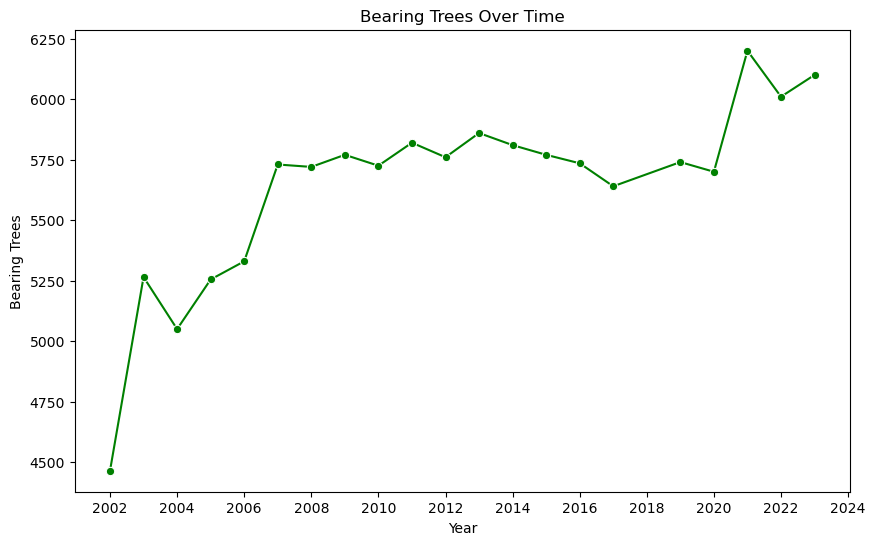

In [13]:
# TODO: BEGIN YOUR EDA!
#How is bearing trees changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this
# variable? Is it normal?

plt.figure(figsize=(10, 6))
sns.lineplot(data=minas_coffee, x="year", y="bearing_trees", marker="o", color="green")
plt.title("Bearing Trees Over Time")
plt.xlabel("Year")
plt.ylabel("Bearing Trees")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))



### Observations and Questions gained from Pearson Correlation Coefficient between Maximum Temperature and 60kgs Bags:


**Observations**
- According to the Pearson Correlation Coefficient

**Questions**
- A

Additional Notes: 
- A

**Resources:**

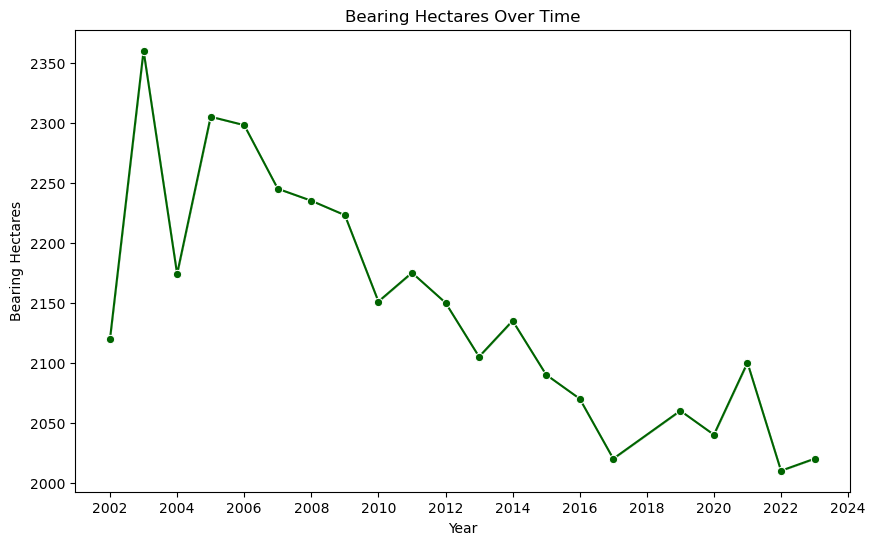

In [14]:
# TODO: BEGIN YOUR EDA!
plt.figure(figsize=(10, 6))
sns.lineplot(data=dropp_coffee, x="year", y="bearing_hectares", marker="o", color="darkgreen")
plt.title("Bearing Hectares Over Time")
plt.xlabel("Year")
plt.ylabel("Bearing Hectares")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))

### Observations and Questions gained from Pearson Correlation Coefficient between Maximum Temperature and 60kgs Bags:


**Observations**
- According to the Pearson Correlation Coefficient

**Questions**
- A

Additional Notes: 
- A

**Resources:**

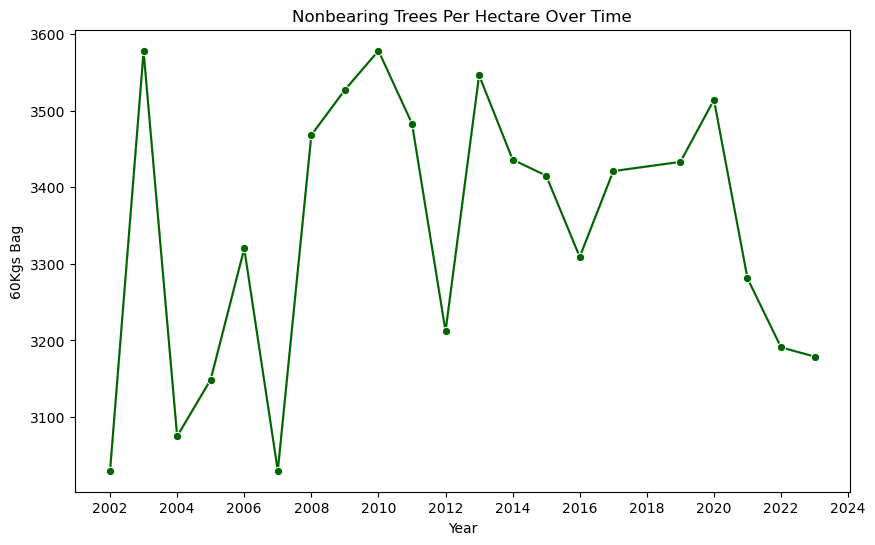

In [15]:
# 60Kgs Bag  Wind Speed and Average Wind Speed over time.
plt.figure(figsize=(10, 6))
sns.lineplot(data=dropp_coffee, x="year", y="nonbearing_trees_per_hectare", marker="o", color="darkgreen")
plt.title("Nonbearing Trees Per Hectare Over Time")
plt.xlabel("Year")
plt.ylabel("60Kgs Bag")
plt.gca().xaxis.set_major_locator(ticks.MultipleLocator(2))

### Observations and Questions gained from Pearson Correlation Coefficient between Maximum Temperature and 60kgs Bags:


**Observations**
- According to the Pearson Correlation Coefficient

**Questions**
- A

Additional Notes: 
- A

**Resources:**

In [16]:
print(f"Length: {len(minas_coffee['bearing_trees'])}")

print(f"Length: {len(minas_coffee['60kgs_bag'])}")


Length: 21
Length: 21


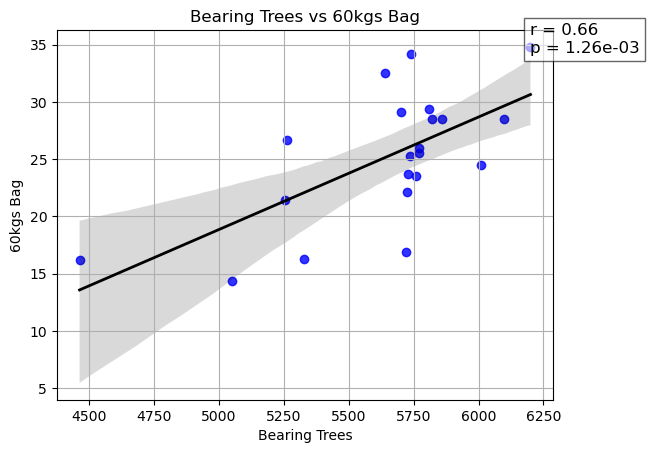

In [17]:
# Calculate correlation coefficient between bearing_trees and 60kgs_bag
# If p_value < r_value then we reject the null hypothesis, meaning tha there is a statistically significant difference between the two variables.
# If p_value > r_value then we reject the null hypothesis, meaning that there is no statistcially signifacant difference between the two variables.
r_value, p_value = pearsonr(x=minas_coffee['bearing_trees'], y=minas_coffee['60kgs_bag'])

# Create scatterplot
sns.regplot(data=minas_coffee, x='bearing_trees', y='60kgs_bag', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})

# Add correlation coefficient to plot
plt.text(
    x=minas_coffee['bearing_trees'].max() - 2,
    y=minas_coffee['60kgs_bag'].max() - 0.5,
    fontsize=12,
    s=f"r = {r_value:.2f}\np = {p_value:.2e}",
    bbox=dict(facecolor='white', alpha=0.6)
)
plt.title("Bearing Trees vs 60kgs Bag")
plt.xlabel("Bearing Trees") 
plt.ylabel("60kgs Bag")
plt.grid(True) 

### Observations and Questions gained from Pearson Correlation Coefficient between Maximum Temperature and 60kgs Bags:


**Observations**
- According to the Pearson Correlation Coefficient

**Questions**
- A

Additional Notes: 
- A

**Resources:**

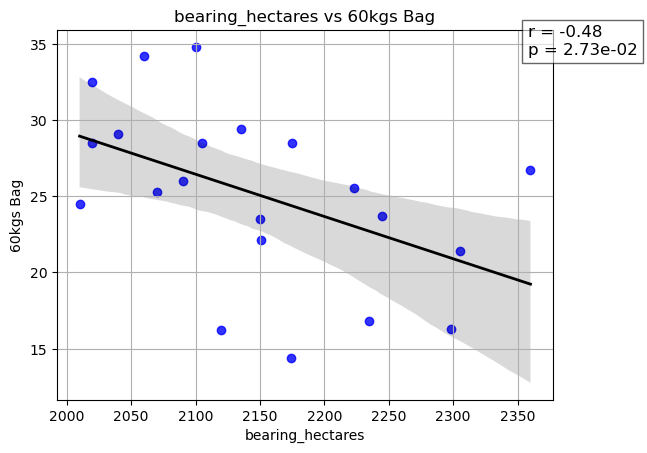

In [18]:
# Calculate correlation coefficient between bearing_trees and 60kgs_bag
# If p_value < r_value then we reject the null hypothesis, meaning tha there is a statistically significant difference between the two variables.
# If p_value > r_value then we reject the null hypothesis, meaning that there is no statistcially signifacant difference between the two variables.
r_value, p_value = pearsonr(x=minas_coffee['bearing_hectares'], y=minas_coffee['60kgs_bag'])

# Create scatterplot
sns.regplot(data=minas_coffee, x='bearing_hectares', y='60kgs_bag', scatter_kws={'color': 'blue'}, line_kws={'color': 'black', 'linewidth': 2})

# Add correlation coefficient to plot
plt.text(
    x=minas_coffee['bearing_hectares'].max() - 2,
    s=f"r = {r_value:.2f}\np = {p_value:.2e}",
    y=minas_coffee['60kgs_bag'].max() - 0.5,
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.6)
)
plt.title("bearing_hectares vs 60kgs Bag")
plt.xlabel("bearing_hectares") 
plt.ylabel("60kgs Bag")
plt.grid(True) 

### Observations and Questions gained from Pearson Correlation Coefficient between Maximum Temperature and 60kgs Bags:


**Observations**
- According to the Pearson Correlation Coefficient

**Questions**
- A

Additional Notes: 
- A

**Resources:**

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is bearing trees changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

Answer here

How is bearing hectares changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

Answer here

How is the count of million 60kgs bags of coffee changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

Answer here

What is the relationship between bearing_trees and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here

What is the relationship between bearing_hectares and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer here